# IS450 : Text Mining and Language Processing

## Lab 1


### Objectives 


-   To get familiar with some basics of Python programming - Optional.
-   To try out some data structures and functions within NLTK.
-   Explore frequency related functions


### Some Basics on Python Programming 

If you are familiar with Python, you can skip this section. If you are familiar with programming in general but not the Python language, you may want to skim through this section.

#### Variables

As with any programming language, a very basic concept in Python is __variable__. Just like what you have learned in your algebra class, a <b>variable</b> is a <b>name</b> (or symbol) that <b>refers to a value</b>. In algebra, variables refer to numbers only. In programming languages, variables can refer to numbers, text and other types of data.

Let's take a look at the code below for an example. Run the code below to see what output you get.

In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [26]:
import pandas as pd

# Load the cleaned dataset with named entities
file_path = "postings_large.csv"

df = pd.read_csv(file_path)

# Check the first few rows
print(df.head(10))

dataset_overview = {
    "Number of Rows": df.shape[0],
    "Number of Columns": df.shape[1],
    "Missing Values": df.isnull().sum().sum(),
    "Duplicate Rows": df.duplicated().sum(),
    "Columns with Missing Values": df.isnull().sum()[df.isnull().sum() > 0].to_dict(),
}
print(dataset_overview)


      job_id               company_name  \
0     921716      Corcoran Sawyer Smith   
1    1829192                        NaN   
2   10998357     The National Exemplar    
3   23221523     Abrams Fensterman, LLP   
4   35982263                        NaN   
5   91700727  Downtown Raleigh Alliance   
6  103254301                 Raw Cereal   
7  112576855                        NaN   
8    1218575        Children's Nebraska   
9    2264355            Bay West Church   

                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   
5           Economic Development and Planning Intern   
6                                           Producer   
7                                  Building Engineer   
8                     

In [27]:
# Job Title & Industry Distribution
top_job_titles = df['title'].value_counts().head(20)

# Skill Analysis (Extracting Skills)
df['skills_desc'].fillna('', inplace=True)  # Fill NaN values with empty string
all_skills_text = ' '.join(df['skills_desc'].dropna().astype(str))
word_tokens = word_tokenize(all_skills_text.lower())
filtered_skills = [word for word in word_tokens if word.isalpha() and word not in stopwords.words('english')]
skill_counts = Counter(filtered_skills).most_common(20)

# Salary Analysis & Standardization
def standardize_salary(row):
    if pd.notnull(row['max_salary']) and pd.notnull(row['pay_period']):
        if row['pay_period'] == 'HOURLY':
            return row['max_salary'] * 40 * 52  # Convert hourly wage to annual salary
        elif row['pay_period'] == 'MONTHLY':
            return row['max_salary'] * 12  # Convert monthly salary to annual salary
        elif row['pay_period'] == 'WEEKLY':
            return row['max_salary'] * 52  # Convert weekly salary to annual salary
        else:
            return row['max_salary']  # Assume yearly if pay_period is already YEARLY
    return 0

df['standardized_salary'] = df.apply(standardize_salary, axis=1)
print(df['standardized_salary'].head(10))


C:\Users\Ray\AppData\Local\Temp\ipykernel_16004\803740588.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['skills_desc'].fillna('', inplace=True)  # Fill NaN values with empty string


0     41600.0
1    104000.0
2     65000.0
3    175000.0
4     80000.0
5     41600.0
6    300000.0
7    120000.0
8         0.0
9         0.0
Name: standardized_salary, dtype: float64


In [28]:
# Job Description Length & Structure
df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))

# Word Frequency Analysis for Job Descriptions
all_text = ' '.join(df['description'].dropna().astype(str))
word_tokens = word_tokenize(all_text.lower())
filtered_words = [word for word in word_tokens if word.isalpha() and word not in stopwords.words('english')]
word_counts = Counter(filtered_words).most_common(30)

# Text Preprocessing
lemmatizer = WordNetLemmatizer()
df['cleaned_description'] = df['description'].astype(str).apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x.lower()) if word.isalpha() and word not in stopwords.words('english')])
)

print(df['cleaned_description'].head(10))


0    job descriptiona leading real estate firm new ...
1    aspen therapy wellness committed serving clien...
2    national exemplar accepting application assist...
3    senior associate attorney elder law trust esta...
4    looking hvac service tech experience commerica...
5    job summary economic development planning inte...
6    company descriptionraw cereal creative design ...
7    summary due pending retirement building engine...
8    child region pediatric healthcare center peopl...
9    exciting time part church looking right energe...
Name: cleaned_description, dtype: object


2627
[('healthcare', 66), ('hospice care, patient care', 53), ('microsoft office', 43), ('csr', 42), ('verbal / written communication', 39), ('customer service', 39), ('excel', 36), ('sql', 32), ('bachelor', 30), ('medtronic', 26), ('animal care / handling, animal therapy', 23), ('401k', 21), ('dental', 19), ('people skills', 19), ('contact lenses', 19), ('vision', 19), ('ged', 19), ('aws', 16), ('disaster relief care & shelters', 16), ('ms office', 15), ('ada', 15), ('interactive/social media/seo, marketing & communications', 14), ('microsoft', 13), ('social media / blogging', 13), ('project management', 13), ('the work conditions and physical', 12), ('adult education', 11), ('brand development & messaging', 11), ('general education', 10), ('mip', 10)]
                                                Skill  Frequency
0                                          healthcare         66
1                          hospice care, patient care         53
2                                    micr

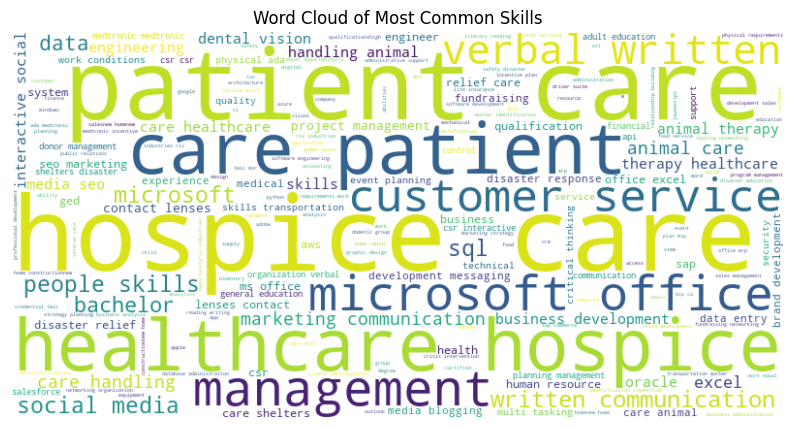

In [42]:
import spacy

nlp = spacy.load("en_core_web_sm", disable=["parser", "textcat"])

# Extract job descriptions and skills_desc
df['skills_desc'] = df['skills_desc'].fillna('')  # Fill NaNs without inplace
# df['description'] = df['description'].fillna('')  # Fill NaNs without inplace
text_data = (df['skills_desc']).tolist()  # Merge both columns for skill extraction Removed Description 

### Step 1: Use spaCy NER to Extract Skills ###
skills_list = []  # List to store extracted skills

for doc in nlp.pipe(text_data, batch_size=50, n_process=2):  # Batch processing for efficiency
    for ent in doc.ents:
        if ent.label_ in ["ORG", "PRODUCT", "WORK_OF_ART"]:  # These categories may contain skills
            skills_list.append(ent.text.lower())
print(len(skills_list))
skill_counts = Counter(skills_list).most_common(30)
print(skill_counts)
skill_freq_df = pd.DataFrame(skill_counts, columns=['Skill', 'Frequency'])
print(skill_freq_df)  # Display skill frequency table

### Step 3: Generate Word Cloud of Extracted Skills ###
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(skills_list))

# Display Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Common Skills")
plt.show()


In [30]:
pip install rake-nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                    Skill  Frequency
0                   29463       1092
1       position requires        432
2        following skills        430
3                   29462        367
4                 ability        341
5                    must        220
6              experience        169
7                    work        119
8                    able        114
9                required         97
10                 degree         88
11          people skills         86
12               employee         78
13     community outreach         78
14              knowledge         74
15                    job         74
16                 duties         70
17             healthcare         67
18                perform         62
19                 verbal         62
20           hospice care         62
21    essential functions         61
22                   time         61
23  written communication         59
24              education         56
25           patient care         56
2

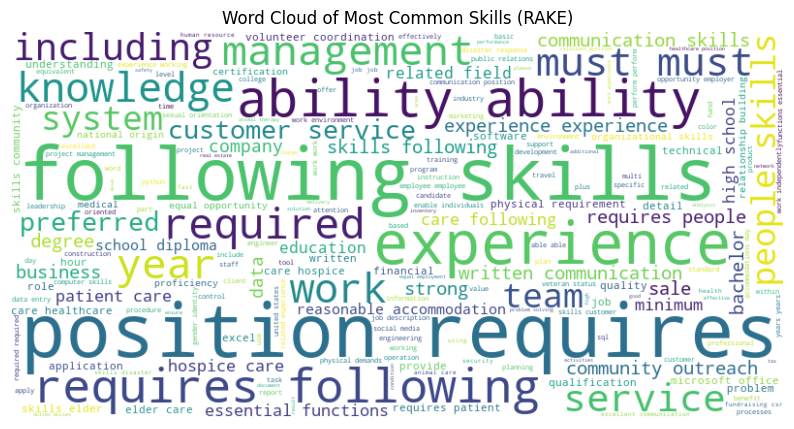

In [40]:
from rake_nltk import Rake

# Initialize RAKE for keyword extraction Unsupervised
rake = Rake()

# Apply RAKE on job descriptions
df['skills_desc'] = df['skills_desc'].fillna('')  # Fill NaNs without inplace
text_data = (df['skills_desc']).tolist()

# Extract skills using RAKE
skills_list = []
for text in text_data:
    rake.extract_keywords_from_text(text)
    skills_list.extend(rake.get_ranked_phrases())

# Get most common extracted skills
skill_counts = Counter(skills_list).most_common(30)
skill_freq_df = pd.DataFrame(skill_counts, columns=['Skill', 'Frequency'])
print(skill_freq_df)  # Display skill frequency table

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(skills_list))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Common Skills (RAKE)")
plt.show()


In [32]:
# !pip install spacy
# !python -m spacy download en_core_web_trf


In [33]:
# nltk.download('averaged_perceptron_tagger')

# # Apply POS tagging, Job roles such as Analyst will appear as (NOUN), Job skillsets such as SQL/PYTHON will appear as (PROPN). useful for NER later
# df["pos_tags"] = df["lemmatized_tokens"].apply(nltk.pos_tag)

# print(df.head(10))


In [43]:

# Save the cleaned text data to a new file
output_csv = "large_cleanned_desc_job_posting.csv"


# with open(output_file, "w", encoding="utf-8") as file:
#     file.write("\n".join(df["clean_text"]))

# print(f"Cleaned data saved to {output_file}")
# # Save the cleaned dataset to a CSV file
# output_csv = "cleaned_dataset.csv"

df.to_csv(output_csv, index=False, encoding="utf-8")

print(f"✅ Cleaned data saved to {output_csv}")


✅ Cleaned data saved to large_cleanned_desc_job_posting.csv


In [35]:
# from nltk.chunk import ne_chunk

# nltk.download('maxent_ne_chunker')
# nltk.download('words')

# # Apply Named Entity Recognition (NER)
# df["named_entities"] = df["pos_tags"].apply(ne_chunk)

# # Display first few rows
# print(df.head(10))


In [36]:
# import spacy
# # Download the English model
# import subprocess
# subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
# # Load spaCy's pretrained model (much faster than NLTK)
# nlp = spacy.load("en_core_web_sm")

# # Function to extract named entities
# def extract_entities(text):
#     doc = nlp(text)
#     return [(ent.text, ent.label_) for ent in doc.ents]  # Extract entity + label

# # Apply to dataset
# df["named_entities"] = df["clean_text"].apply(extract_entities)

# # Display results
# print(df.head(10))


Lists are important in this course because when we represent a piece of text in Python, we often represent it as a list of words first before we
perform any analysis on it.

Issue with list. Unlike other data types, when making a copy of a list object, any changes made to that copy would reflect in the original object. 

In [41]:
import pandas as pd

# Load the cleaned dataset with named entities
file_path = "computing_job_postings.csv"

df2 = pd.read_csv(file_path)

# Check the first few rows
print(df2.head(10))

dataset_overview2 = {
    "Number of Rows": df2.shape[0],
    "Number of Columns": df2.shape[1],
    "Missing Values": df2.isnull().sum().sum(),
    "Duplicate Rows": df2.duplicated().sum(),
    "Columns with Missing Values": df2.isnull().sum()[df2.isnull().sum() > 0].to_dict(),
}
print(dataset_overview2)


       job_id                    company_name                         title  \
0    11009123               PGAV Destinations             project architect   
1    69333422                 Staffing Theory     product marketing manager   
2   133130219                             NaN             software engineer   
3   175485704                            GOYT             software engineer   
4   266825034              Recruitment Design   software support specialist   
5  2234533717                     Ideando Inc           full stack engineer   
6  2457183642         Galerie Candy and Gifts     quality assurance manager   
7  2735151240                LT Apparel Group    intern- business analytics   
8  2987175317  W.C. Construction Company, LLC  construction project manager   
9  3045980831          Armstrong Builders LLC              project engineer   

                                         description  max_salary pay_period  \
0  PGAV Destinations is seeking a self-motivated ..

In [ ]:
# Job Title & Industry Distribution
top_job_titles = df['title'].value_counts().head(20)

# Skill Analysis (Extracting Skills)
df['skills_desc'].fillna('', inplace=True)  # Fill NaN values with empty string
all_skills_text = ' '.join(df['skills_desc'].dropna().astype(str))
word_tokens = word_tokenize(all_skills_text.lower())
filtered_skills = [word for word in word_tokens if word.isalpha() and word not in stopwords.words('english')]
skill_counts = Counter(filtered_skills).most_common(20)

# Salary Analysis & Standardization
def standardize_salary(row):
    if pd.notnull(row['max_salary']) and pd.notnull(row['pay_period']):
        if row['pay_period'] == 'HOURLY':
            return row['max_salary'] * 40 * 52  # Convert hourly wage to annual salary
        elif row['pay_period'] == 'MONTHLY':
            return row['max_salary'] * 12  # Convert monthly salary to annual salary
        elif row['pay_period'] == 'WEEKLY':
            return row['max_salary'] * 52  # Convert weekly salary to annual salary
        else:
            return row['max_salary']  # Assume yearly if pay_period is already YEARLY
    return 0

df['standardized_salary'] = df.apply(standardize_salary, axis=1)
print(df['standardized_salary'].head(10))


<b><i>How  to copy a list so that the copy have no relation to the original?<b><i>

By now you might have noticed that unlike some other programming languages such as C/C++ and Java, in Python variables are not associated with __fixed data types__, i.e., Python is a
__dynamically typed__ programming language. This means when we declare a
variable in Python, we do not need to specify its data type. A
variable’s data type may also change dynamically, as illustrated in the code below:


To find out the type of a variable, you can use the __type()__ function, as shown below. Note that whole numbers's type is __int__ while decimal numbers' type is __float__.